In [1]:
!git clone https://github.com/camillasancricca/DATADIQ.git

Cloning into 'DATADIQ'...


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LIST OF ALGORITHMS FOR CLASSIFICATION, REGRESSION & CLUSTERING
CLASSIFICATION_ALGORITHMS = ["DecisionTree", "LogisticRegression", "KNN", "RandomForest", "AdaBoost", "MLP"]

SEED = 2023

### **Dimensionality Reduction on Number of Features**

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

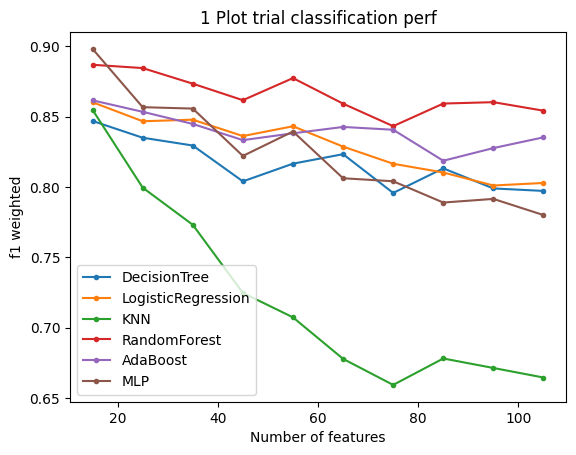

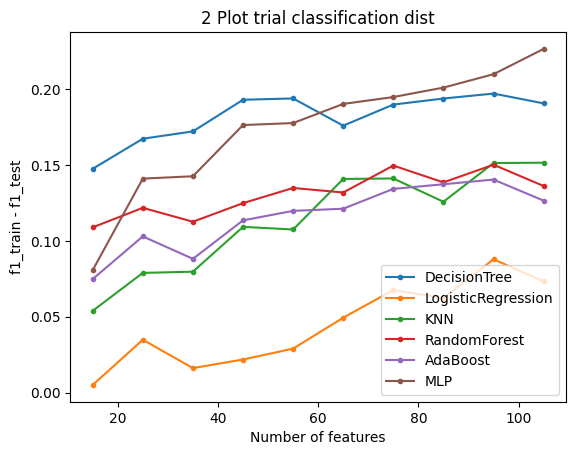

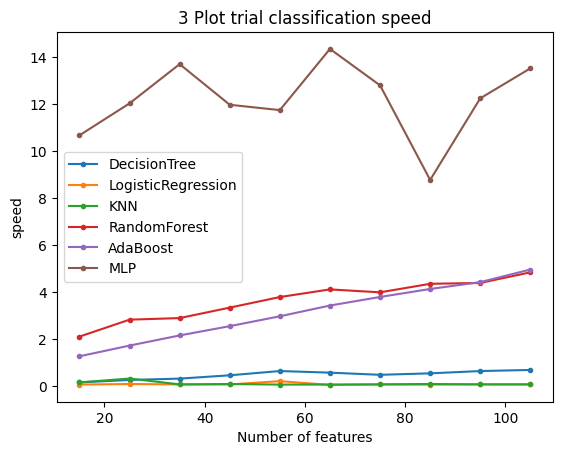

In [3]:
from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot


if __name__ == '__main__':

    results_for_each_algorithm = []
    
    for algorithm in CLASSIFICATION_ALGORITHMS:

        results_single_algorithm = []

        for n_additional_features in range(10, 110, 10):
            # A: DATA COLLECTION
            X, y = make_dataset_for_classification(
                n_samples = 1000,
                n_features = 5 + n_additional_features,
                n_informative = 5,
                n_redundant = 0,
                n_repeated = 0,
                n_classes = 2,
                n_clusters_per_class = 2,
                weights = None,
                flip_y = 0.01,
                class_sep = 1.0,
                hypercube = True,
                seed = SEED
            )

            # DATA ANALYSIS
            results_1_analysis = classification(X, y, algorithm, SEED)
            results_single_algorithm.append(results_1_analysis)
    
        results_for_each_algorithm.append(results_single_algorithm)

 
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
n_features = [5 + n_additional_features for n_additional_features in range(10, 110, 10)]
plot(x_axis_values = n_features, x_label = "Number of features", results = results_for_each_algorithm, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
plot(x_axis_values = n_features, x_label = "Number of features", results = results_for_each_algorithm, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
plot(x_axis_values = n_features, x_label = "Number of features", results = results_for_each_algorithm, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")

### **Dimensionality Reduction on Number of Samples**

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

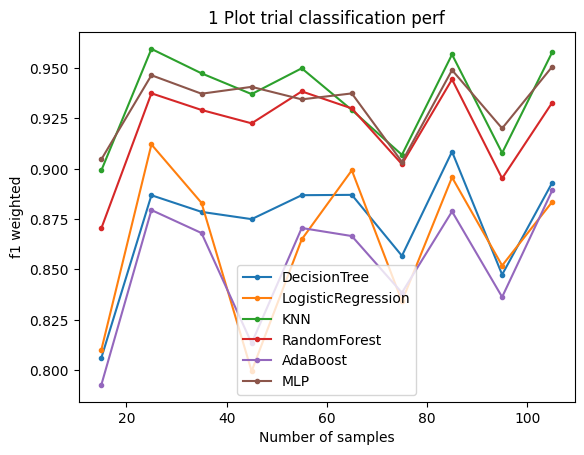

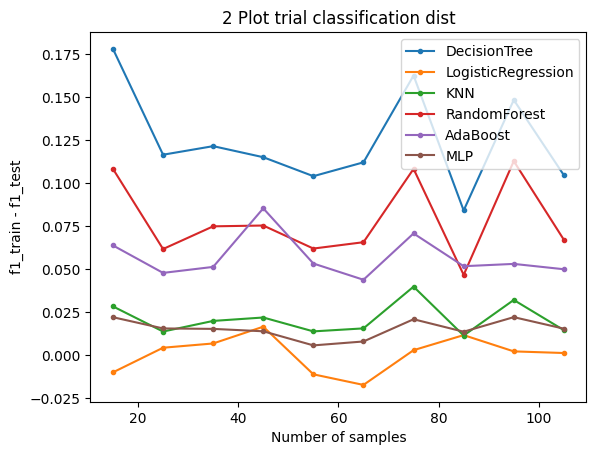

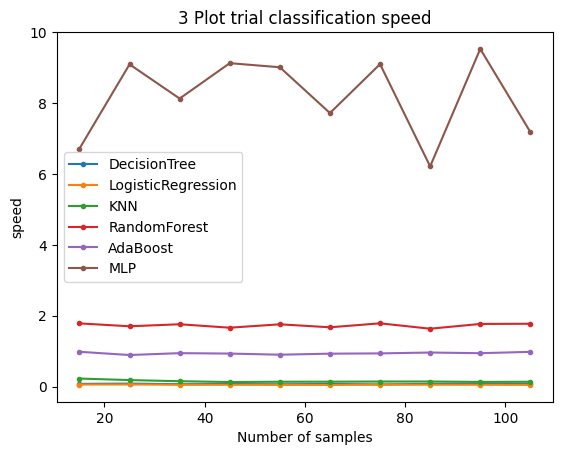

In [4]:
from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot


if __name__ == '__main__':

    results_for_each_algorithm = []
    
    for algorithm in CLASSIFICATION_ALGORITHMS:

        results_single_algorithm = []

        for n_additional_samples in range(10, 110, 10):
            # A: DATA COLLECTION
            X, y = make_dataset_for_classification(
                n_samples = 1000 + n_additional_samples,
                n_features = 5,
                n_informative = 5,
                n_redundant = 0,
                n_repeated = 0,
                n_classes = 2,
                n_clusters_per_class = 2,
                weights = None,
                flip_y = 0.01,
                class_sep = 1.0,
                hypercube = True,
                seed = SEED
            )

            # DATA ANALYSIS
            results_1_analysis = classification(X, y, algorithm, SEED)
            results_single_algorithm.append(results_1_analysis)
    
        results_for_each_algorithm.append(results_single_algorithm)

 
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
n_samples = [5 + n_additional_samples for n_additional_samples in range(10, 110, 10)]
plot(x_axis_values = n_features, x_label = "Number of samples", results = results_for_each_algorithm, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
plot(x_axis_values = n_features, x_label = "Number of samples", results = results_for_each_algorithm, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
plot(x_axis_values = n_features, x_label = "Number of samples", results = results_for_each_algorithm, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")

### **One Experiment for Deduplication**

In [26]:
import numpy as np

def add_non_exact_duplicates(X: np.array, y: list, percentage_added: float) -> tuple:
    X_duplicates, y_duplicates = list(), list()

    selected_indices = np.random.choice(len(X), int(len(X) * percentage_added), replace = False)

    for index in selected_indices:
        X_duplicates.append( X[index] + np.random.normal(0, 0.1, size = X[index].shape) )
        y_duplicates.append( y[index] )

    X_duplicated = np.vstack([X, np.array(X_duplicates)])
    y_duplicated = np.concatenate([np.array(y), np.array(y_duplicates)])

    np.random.shuffle(X_duplicated)
    np.random.shuffle(y_duplicated)

    return X_duplicated, y_duplicated


In [40]:
import pandas as pd
import numpy as np
from recordlinkage import recordlinkage

def remove_duplicates(X_duplicated: np.array, y_duplicated: np.array):
    # Combine X and y into a DataFrame for record linkage
    data = pd.DataFrame(np.column_stack((X_duplicated, y_duplicated)), columns=[f'X{i}' for i in range(X_duplicated.shape[1])] + ['y'])

    # Convert float values to strings
    data = data.astype(str)

    # Record linkage to detect and remove duplicates
    indexer = recordlinkage.Index()
    indexer.full()
    pairs = indexer.index(data)

    compare_cl = recordlinkage.Compare()
    
    # Adjust the labels in the string method to match the column labels
    for i in range(X_duplicated.shape[1]):
        compare_cl.string(f'X{i}', f'X{i}', method='levenshtein', threshold=0.8)

    features = compare_cl.compute(pairs, data)

    # Assuming a threshold of 0.8 for levenshtein similarity, you can adjust this based on your needs
    potential_duplicates = features[features.sum(axis=1) > 0.8].index.get_level_values(1)
    
    # Remove the detected duplicates
    data_no_duplicates = data.drop(index=potential_duplicates)

    # Separate X and y again
    X_no_duplicates = data_no_duplicates.iloc[:, :-1].values
    y_no_duplicates = data_no_duplicates['y'].values

    return X_no_duplicates, y_no_duplicates


Main ...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegre

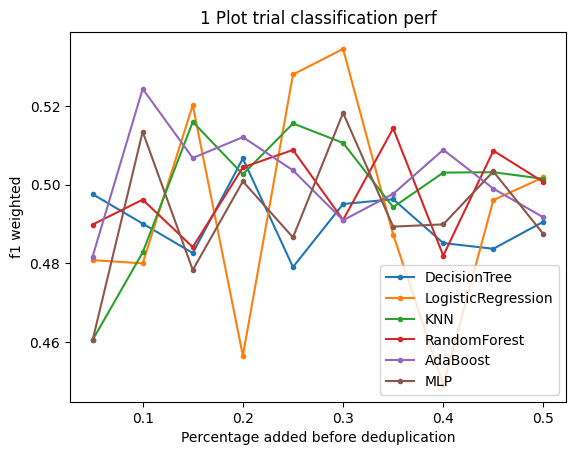

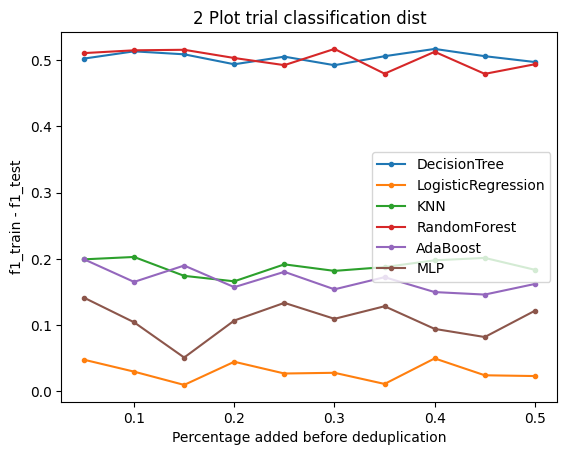

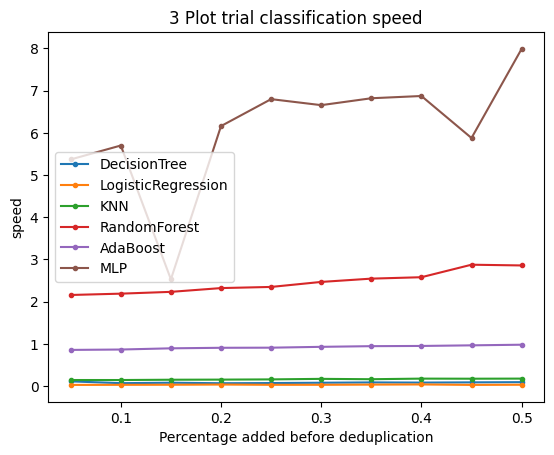

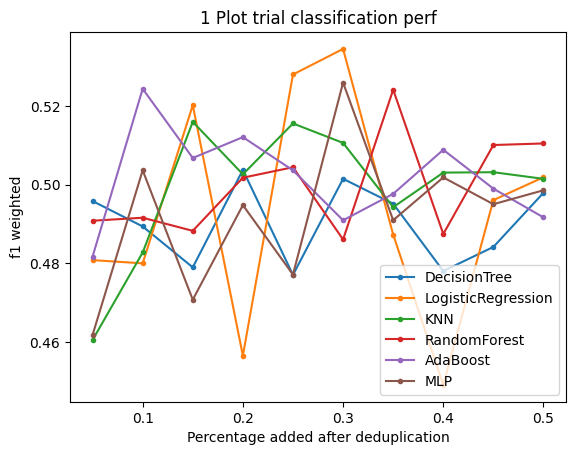

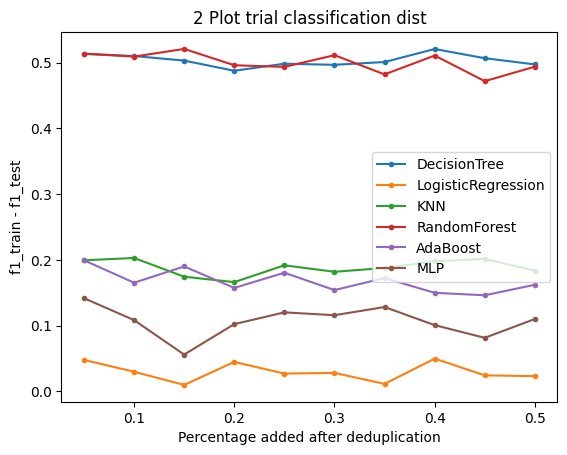

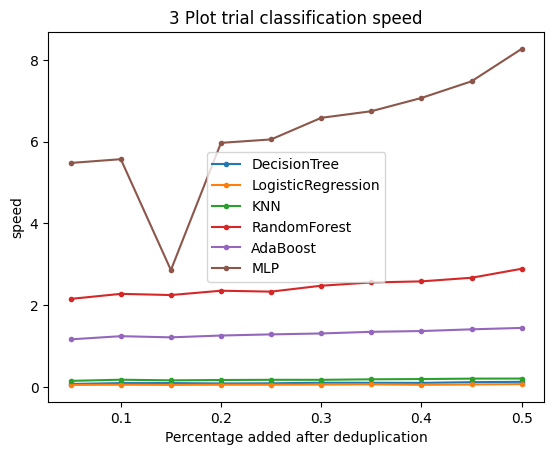

In [41]:
from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

# LIST OF ALGORITHMS FOR CLASSIFICATION, REGRESSION & CLUSTERING
CLASSIFICATION_ALGORITHMS = ["DecisionTree", "LogisticRegression", "KNN", "RandomForest", "AdaBoost", "MLP"]

SEED = 2023

if __name__ == '__main__':

    print("Main ...")

    # DATA COLLECTION
    X, y = make_dataset_for_classification(
        n_samples = 1000,
        n_features = 5,
        n_informative = 5,
        n_redundant = 0,
        n_repeated = 0,
        n_classes = 2,
        n_clusters_per_class = 2,
        weights = None,
        flip_y = 0.01,
        class_sep = 1.0,
        hypercube = True,
        seed = 2023
    )

    results_for_each_algorithm_before_deduplication = []
    results_for_each_algorithm_after_deduplication  = []
    for algorithm in CLASSIFICATION_ALGORITHMS:

        results_single_algorithm_1 = []
        results_single_algorithm_2 = []
        for percentage_added in np.arange(0.05, 0.55, 0.05).tolist():
            # DATA POLLUTION
            X_duplicated, y_duplicated = add_non_exact_duplicates(X, y, percentage_added)

            # DATA ANALYSIS
            results_analysis = classification(X_duplicated, y_duplicated, algorithm, SEED)
            results_single_algorithm_1.append(results_analysis)

            # DATA PREPARATION
            X_deduplicated, y_deduplicated = remove_duplicates(X_duplicated, y_duplicated)

            # DATA ANALYSIS
            results_analysis = classification(X_deduplicated, y_deduplicated, algorithm, SEED)
            results_single_algorithm_2.append(results_analysis)

    
        results_for_each_algorithm_before_deduplication.append(results_single_algorithm_1)
        results_for_each_algorithm_after_deduplication.append(results_single_algorithm_2)


    #PLOT RESULTS
    percentages_added = np.arange(0.05, 0.55, 0.05).tolist()
    
    plot(x_axis_values = percentages_added, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
    plot(x_axis_values = percentages_added, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
    plot(x_axis_values = percentages_added, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")

    plot(x_axis_values = percentages_added, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
    plot(x_axis_values = percentages_added, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
    plot(x_axis_values = percentages_added, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")


### **10 Experiments for Deduplication with different % of similarity**

In [59]:
import numpy as np

# it has fixed number of percentage_added
def add_non_exact_duplicates_2(X: np.array, y: list,  percentage_similarity: float, num_added: int = 200) -> tuple:

    X_duplicates, y_duplicates = list(), list()

    selected_indices = np.random.choice(len(X), num_added, replace = False)

    for index in selected_indices:
        selected_features = np.random.choice(len(X[0]), int(len(X[0]) * (1-percentage_similarity)), replace = False)
        
        new_X_index = X[index]
        new_X_index[selected_features] = new_X_index[selected_features] + np.random.normal(
           0, 0.1, size = new_X_index[selected_features].shape
        )
        
        X_duplicates.append( new_X_index )
        y_duplicates.append( y[index] )

    X_duplicated = np.vstack([X, np.array(X_duplicates)])
    y_duplicated = np.concatenate([np.array(y), np.array(y_duplicates)])

    np.random.shuffle(X_duplicated)
    np.random.shuffle(y_duplicated)

    return X_duplicated, y_duplicated


Main ...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegre

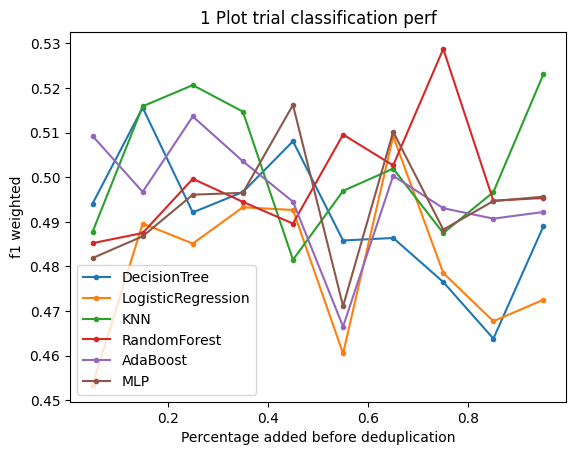

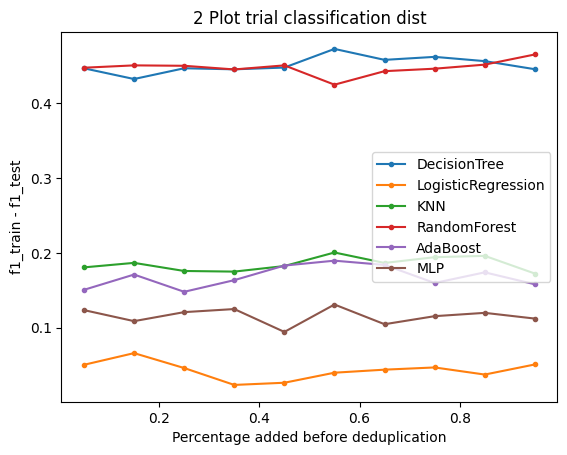

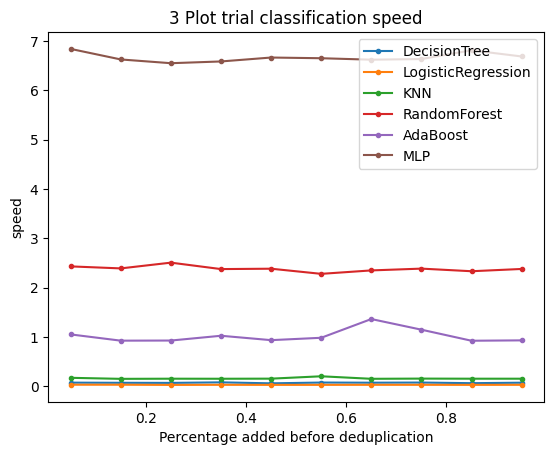

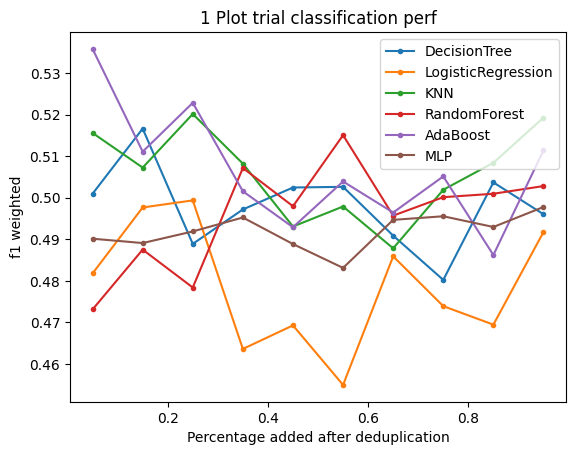

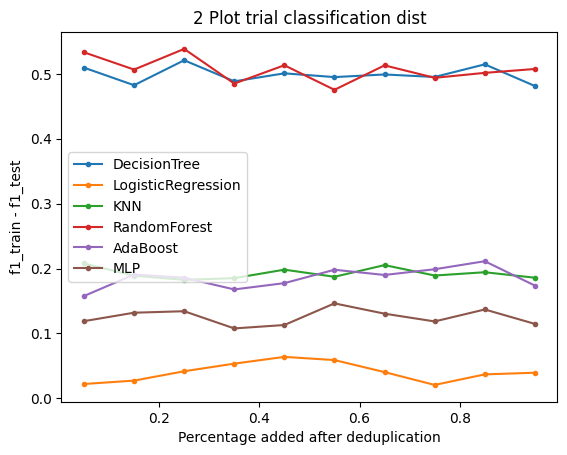

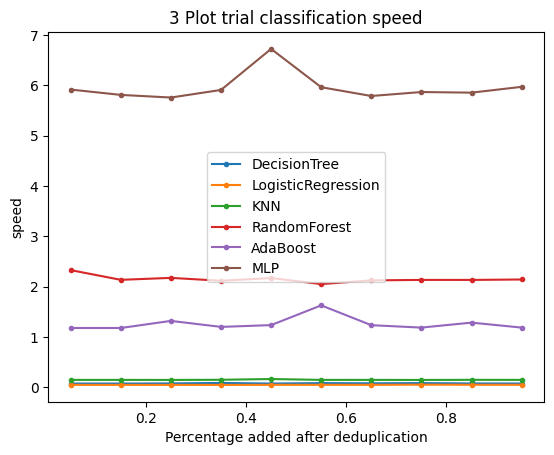

In [60]:
from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

# LIST OF ALGORITHMS FOR CLASSIFICATION, REGRESSION & CLUSTERING
CLASSIFICATION_ALGORITHMS = ["DecisionTree", "LogisticRegression", "KNN", "RandomForest", "AdaBoost", "MLP"]

SEED = 2023

if __name__ == '__main__':

    print("Main ...")

    # DATA COLLECTION
    X, y = make_dataset_for_classification(
        n_samples = 1000,
        n_features = 5,
        n_informative = 5,
        n_redundant = 0,
        n_repeated = 0,
        n_classes = 2,
        n_clusters_per_class = 2,
        weights = None,
        flip_y = 0.01,
        class_sep = 1.0,
        hypercube = True,
        seed = 2023
    )

    results_for_each_algorithm_before_deduplication = []
    results_for_each_algorithm_after_deduplication  = []

    for algorithm in CLASSIFICATION_ALGORITHMS:

        results_single_algorithm_1 = []
        results_single_algorithm_2 = []

        for percentage_similarity in np.arange(0.05, 1, 0.1):
            # DATA POLLUTION
            X_duplicated, y_duplicated = add_non_exact_duplicates_2(X, y, percentage_similarity)
            
            # DATA ANALYSIS
            results_analysis = classification(X_duplicated, y_duplicated, algorithm, SEED)
            results_single_algorithm_1.append(results_analysis)

            # DATA PREPARATION
            X_deduplicated, y_deduplicated = remove_duplicates(X_duplicated, y_duplicated)
            
            # DATA ANALYSIS
            results_analysis = classification(X_deduplicated, y_deduplicated, algorithm, SEED)
            results_single_algorithm_2.append(results_analysis)


        results_for_each_algorithm_before_deduplication.append(results_single_algorithm_1)
        results_for_each_algorithm_after_deduplication.append(results_single_algorithm_2)


    #PLOT RESULTS
    percentages_similarity = np.arange(0.05, 1, 0.1).tolist()

    plot(x_axis_values = percentages_similarity, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
    plot(x_axis_values = percentages_similarity, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
    plot(x_axis_values = percentages_similarity, x_label = "Percentage added before deduplication", results = results_for_each_algorithm_before_deduplication, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")

    plot(x_axis_values = percentages_similarity, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "1 Plot trial classification perf",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "performance")
    plot(x_axis_values = percentages_similarity, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "2 Plot trial classification dist",  algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "distance train-test")
    plot(x_axis_values = percentages_similarity, x_label = "Percentage added after deduplication", results = results_for_each_algorithm_after_deduplication, title = "3 Plot trial classification speed", algorithms = CLASSIFICATION_ALGORITHMS, plot_type = "speed")


In [ ]:
import pandas as pd
from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

# LIST OF ALGORITHMS FOR CLASSIFICATION, REGRESSION & CLUSTERING
CLASSIFICATION_ALGORITHMS = ["DecisionTree", "LogisticRegression", "KNN", "RandomForest", "AdaBoost", "MLP"]

SEED = 2023

if __name__ == '__main__':

    print("Main ...")

    # A: DATA COLLECTION
    X, y = make_dataset_for_classification(
        n_samples = 1000,
        n_features = 5,
        n_informative = 5,
        n_redundant = 0,
        n_repeated = 0,
        n_classes = 2,
        n_clusters_per_class = 2,
        weights = None,
        flip_y = 0.01,
        class_sep = 1.0,
        hypercube = True,
        seed = 2023
    )


    # B: DATA POLLUTION
    # YOUR POLLUTION FUNCTION (on the generated datasets)

    # D: DATA ANALYSIS
    #for algorithm in CLASSIFICATION/REGRESSION/CLUSTERING_ALGORITHMS:
        #results_1_analysis = classification(X, y, algorithm, SEED)
        #results_1_analysis = regression(X, y, algorithm, SEED)
        #results_1_analysis = clustering(X, algorithm, n_clusters, SEED)

    # C: DATA PREPARATION (IF REQUESTED, IT DEPENDS ON THE DQ ISSUE)
    # YOUR DATA PREPARATION FUNCTION (to apply on the generated datasets)

    # D: DATA ANALYSIS ON THE CLEANED DATASETS (re-compute the data analysis evaluation on prepared dataset)
    #for algorithm in CLASSIFICATION/REGRESSION/CLUSTERING_ALGORITHMS:
        #results_2_analysis = classification(X, y, algorithm, SEED):
        #results_2_analysis = regression(X, y, algorithm, SEED)
        #results_2_analysis = clustering(X, algorithm, n_clusters, SEED)

    # E: PLOT RESULTS
    # N.B. IF YOU WANT TO SAVE THE PLOT OR CHANGE THE y_lim THE INSTRUCTIONS ARE INSIDE THE E_plot results
    # plot(x_axis_values, x_label, results, title, algorithms, plot_type)
    # WHERE plot_type = "performance" ("distance train-test" only for classification/regression) "speed"
    # ADD TABLES WITH THE RESULTS!

Main ...


Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

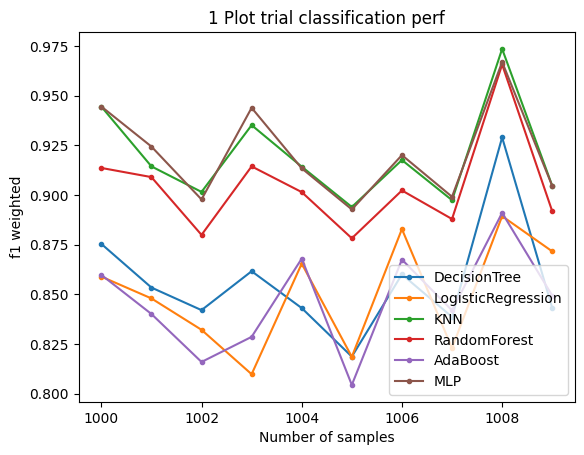

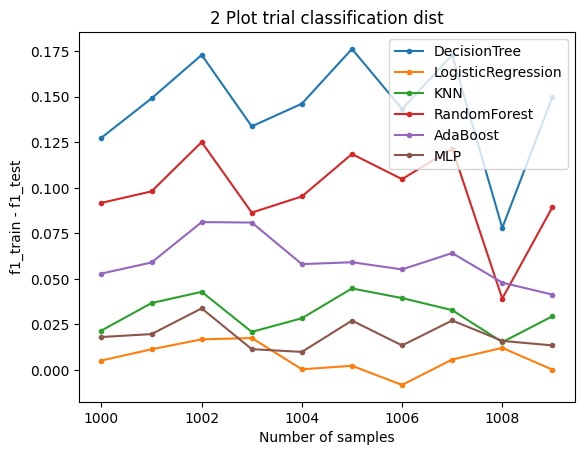

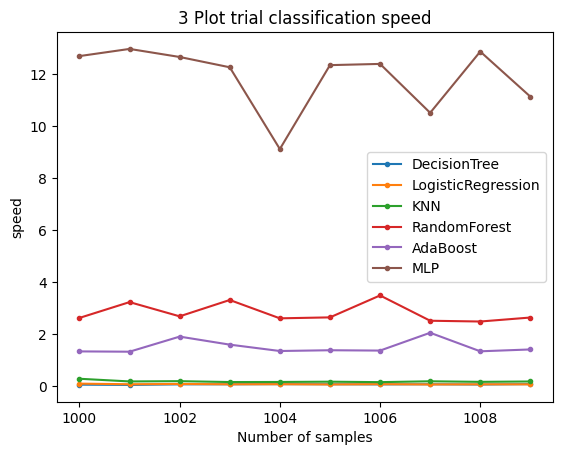

In [ ]:
# CLASSIFICATION EXAMPLE
# (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
# and I generated the three plots for the evaluation of the results)
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0, 10): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_classification(n_samples=1000+i, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

        # DATA ANALYSIS
        results_1_analysis = classification(X, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="1 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="2 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="3 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")